In [13]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from settings import e
from IPython.display import display
from data_handler import DataHandler
from data_multiplier import DataMultiplier
from data_merger import DataMerger
from prediction import Prediction
from settings_for_ml import map_weights
from settings import e

pd.options.display.max_columns = 100
dh = DataHandler()
dm = DataMultiplier()
dme = DataMerger()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# create base data
#%%time
dme.create_base_data_from_dir("../training_data_cratedensity075")

  0%|          | 0/111 [00:00<?, ?it/s]

>> Convert 111 files


100%|██████████| 111/111 [06:30<00:00,  4.37s/it]


>> time to merge files: 390.94 s 
>> shape of data: (61409, 59)
>> save file to ../prediction_data/training_data_cratedensity075_base_data.csv


In [23]:
%%time
df = pd.read_csv('../prediction_data/training_data_cratedensity075_base_data.csv', index_col=0)
print(df.shape)

(61409, 59)
CPU times: user 293 ms, sys: 46.5 ms, total: 339 ms
Wall time: 338 ms


In [24]:
df.head()

ACTIVE_AGENTS  CLOSEST_DISTANCE_BOMB  CLOSEST_DISTANCE_COIN  \
0              4                    0.0                    0.0   
1              4                    0.0                    0.0   
2              4                    0.5                    0.0   
3              4                    0.5                    0.0   
4              4                    0.5                    0.0   

   CLOSEST_DISTANCE_OTHERS  COIN_POTENTIAL_DOWN  COIN_POTENTIAL_LEFT  \
0                     0.50                  0.0                  0.0   
1                     0.50                  0.0                  0.0   
2                     0.50                  0.0                  0.0   
3                     0.54                  0.0                  0.0   
4                     0.57                  0.0                  0.0   

   COIN_POTENTIAL_RIGHT  COIN_POTENTIAL_UP  CRATES_TO_DESTROY_CENTER  \
0                   0.0                0.0                         3   
1                   0.0                0.0                         3   
2                   0.0                0.0                         2   
3                   0.0                0.0                         2   
4                   0.0                0.0                         2   

   CRATES_TO_DESTROY_DOWN  CRATES_TO_DESTROY_LEFT  CRATES_TO_DESTROY_RIGHT  \
0                       0                       0                        2   
1                       0                       0                        2   
2                       3                       0                        0   
3                       3                       0                        0   
4                       3                       0                        0   

   CRATES_TO_DESTROY_UP  CURRENT_SCORE  CUT_OFF_FUTURE_REWARDS0.795  \
0                     2              0                            0   
1                     2              0                            0   
2                     0              0                            0   
3                     0              0                            0   
4                     0              0                            0   

   CUT_OFF_SURVIVE4  DANGER_LEVEL_CENTER  DANGER_LEVEL_DOWN  \
0                 0                  0.0                0.0   
1                 0                  0.0                0.0   
2                 0                  0.0                0.0   
3                 0                  0.0                0.0   
4                 0                  0.0                0.0   

   DANGER_LEVEL_LEFT  DANGER_LEVEL_RIGHT  DANGER_LEVEL_UP  DEAD_END_DOWN  \
0                0.0                 0.0              0.0              0   
1                0.0                 0.0              0.0              0   
2                0.0                 0.0              0.0              0   
3                0.0                 0.0              0.0              0   
4                0.0                 0.0              0.0              0   

   DEAD_END_LEFT  DEAD_END_RIGHT  DEAD_END_UP  DOF_DOWN  DOF_LEFT  DOF_RIGHT  \
0              0               1            1         0         0          1   
1              0               1            1         0         0          1   
2              0               0            0         2         0          0   
3              0               0            0         2         0          0   
4              0               0            0         2         0          0   

   DOF_UP  FUTURE_REWORDS_DISCOUNT0.795  GAME  MAX_COIN_POTENTIAL_DOWN  \
0       1                           0.0     0                        0   
1       1                           0.0     0                        0   
2       0                           0.0     0                        0   
3       0                           0.0     0                        0   
4       0                           0.0     0                        0   

   MAX_COIN_POTENTIAL_LEFT  MAX_COIN_POTENTIAL_RIGHT  MAX_COIN_POTENTIAL_UP  \
0  

In [25]:
%%time
# create data for p1 - prediction
dme.prepare_p1_data("../prediction_data/training_data_cratedensity075_base_data.csv")

>> shape of base data  (61409, 59)
>> shape of base data after cut-off  (58535, 59)
>> shape of data after balancing  (46656, 59)
The following columns will not be reflected:  {'DEAD_END_DOWN', 'MAX_OTHER_PLAYER_POTENTIAL_UP', 'CLOSEST_DISTANCE_OTHERS', 'OTHER_PLAYER_POTENTIAL_DOWN', 'FUTURE_REWORDS_DISCOUNT0.795', 'RELATIVE_Y', 'MAX_COIN_POTENTIAL_UP', 'CLOSEST_DISTANCE_COIN', 'DOF_DOWN', 'NEXT_EVENT_DOWN', 'DANGER_LEVEL_UP', 'RELATIVE_X', 'DANGER_LEVEL_DOWN', 'CRATES_TO_DESTROY_DOWN', 'COIN_POTENTIAL_UP', 'MAX_OTHER_PLAYER_POTENTIAL_DOWN', 'OTHER_PLAYER_POTENTIAL_UP', 'DEAD_END_UP', 'CRATES_TO_DESTROY_UP', 'MAX_COIN_POTENTIAL_DOWN', 'CLOSEST_DISTANCE_BOMB', 'DOF_UP', 'NEXT_EVENT_UP', 'COIN_POTENTIAL_DOWN'}
The Following Columns will not be rotated:  {'CLOSEST_DISTANCE_COIN', 'CLOSEST_DISTANCE_OTHERS', 'FUTURE_REWORDS_DISCOUNT0.795', 'RELATIVE_Y', 'RELATIVE_X', 'CLOSEST_DISTANCE_BOMB'}
The Following Columns will not be rotated:  {'CLOSEST_DISTANCE_COIN', 'CLOSEST_DISTANCE_OTHERS', 'FU

In [26]:
%%time
# create data for p2 - prediction
dme.prepare_p2_data("../prediction_data/training_data_cratedensity075_base_data.csv")

>> shape of base data  (61409, 59)
>> shape of base data after cut-off  (58535, 59)
>> shape of data for positive future rewards:  (58535, 59)
The following columns will not be reflected:  {'DEAD_END_DOWN', 'MAX_OTHER_PLAYER_POTENTIAL_UP', 'CLOSEST_DISTANCE_OTHERS', 'OTHER_PLAYER_POTENTIAL_DOWN', 'FUTURE_REWORDS_DISCOUNT0.795', 'RELATIVE_Y', 'MAX_COIN_POTENTIAL_UP', 'CLOSEST_DISTANCE_COIN', 'DOF_DOWN', 'NEXT_EVENT_DOWN', 'DANGER_LEVEL_UP', 'RELATIVE_X', 'DANGER_LEVEL_DOWN', 'CRATES_TO_DESTROY_DOWN', 'COIN_POTENTIAL_UP', 'MAX_OTHER_PLAYER_POTENTIAL_DOWN', 'OTHER_PLAYER_POTENTIAL_UP', 'DEAD_END_UP', 'CRATES_TO_DESTROY_UP', 'MAX_COIN_POTENTIAL_DOWN', 'CLOSEST_DISTANCE_BOMB', 'DOF_UP', 'NEXT_EVENT_UP', 'COIN_POTENTIAL_DOWN'}
The Following Columns will not be rotated:  {'CLOSEST_DISTANCE_COIN', 'CLOSEST_DISTANCE_OTHERS', 'FUTURE_REWORDS_DISCOUNT0.795', 'RELATIVE_Y', 'RELATIVE_X', 'CLOSEST_DISTANCE_BOMB'}
The Following Columns will not be rotated:  {'CLOSEST_DISTANCE_COIN', 'CLOSEST_DISTANCE

In [27]:
%%time
# create data for p3 - prediction
dme.prepare_p3_data("../prediction_data/training_data_cratedensity075_base_data.csv")

>> shape of base data  (61409, 59)
>> shape of base data after cut-off  (60857, 59)
>> shape of data after balancing  (2448, 59)
The following columns will not be reflected:  {'DEAD_END_DOWN', 'MAX_OTHER_PLAYER_POTENTIAL_UP', 'CLOSEST_DISTANCE_OTHERS', 'OTHER_PLAYER_POTENTIAL_DOWN', 'RELATIVE_Y', 'MAX_COIN_POTENTIAL_UP', 'CLOSEST_DISTANCE_COIN', 'DOF_DOWN', 'NEXT_EVENT_DOWN', 'DANGER_LEVEL_UP', 'RELATIVE_X', 'DANGER_LEVEL_DOWN', 'CRATES_TO_DESTROY_DOWN', 'COIN_POTENTIAL_UP', 'MAX_OTHER_PLAYER_POTENTIAL_DOWN', 'OTHER_PLAYER_POTENTIAL_UP', 'SURVIVE_4STEPS', 'DEAD_END_UP', 'CRATES_TO_DESTROY_UP', 'MAX_COIN_POTENTIAL_DOWN', 'CLOSEST_DISTANCE_BOMB', 'DOF_UP', 'NEXT_EVENT_UP', 'COIN_POTENTIAL_DOWN'}
The Following Columns will not be rotated:  {'CLOSEST_DISTANCE_COIN', 'SURVIVE_4STEPS', 'CLOSEST_DISTANCE_OTHERS', 'RELATIVE_Y', 'RELATIVE_X', 'CLOSEST_DISTANCE_BOMB'}
The Following Columns will not be rotated:  {'CLOSEST_DISTANCE_COIN', 'SURVIVE_4STEPS', 'CLOSEST_DISTANCE_OTHERS', 'RELATIVE_Y', 

In [28]:
files = os.listdir("../prediction_data/")
files

['p2_continuous_future_rewards_data_training_data_cratedensity0.csv',
 '.DS_Store',
 'p3_survive_data_training_data_cratedensity0.csv',
 'training_data_cratedensity0_base_data.csv',
 'p1_categorical_positive_future_rewards_data_training_data_cratedensity0.csv']

In [8]:
df1 = pd.read_csv("../prediction_data/" + np.array([f for f in files if f.startswith("p1")])[0], index_col=0)

In [9]:
df2 = pd.read_csv("../prediction_data/" + np.array([f for f in files if f.startswith("p2")])[0], index_col=0)

In [10]:
df3 = pd.read_csv("../prediction_data/" + np.array([f for f in files if f.startswith("p3")])[0], index_col=0)

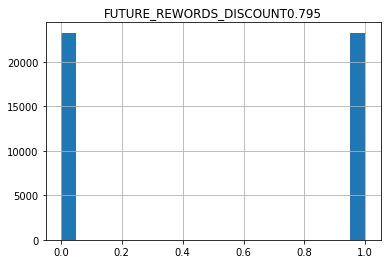

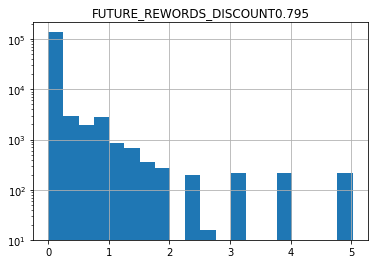

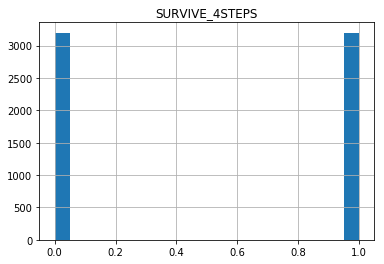

In [11]:
dme.plot_hist(df1, logy=False)
dme.plot_hist(df2, logy=True)
dme.plot_hist(df3, target="SURVIVE_4STEPS", logy=False)


In [ ]:
# dme.create_base_data_from_dir("../training_data_cratedensity0")

In [ ]:
os.listdir(".")

In [ ]:
df_ = pd.read_csv("training_data_cratedensity0_base_data.csv", index_col = 0)

In [ ]:
df_.head()

In [ ]:
%%time
df_initial = dme.directory_to_df("../training_data_cratedensity0")

In [ ]:
df_initial.shape

In [ ]:
df = df_initial.copy()

In [ ]:
df.head()

In [ ]:
df[["CURRENT_SCORE", "STEP", "FUTURE_REWORDS_DISCOUNT0.795", "NAME"]].head()

In [ ]:
df.shape

### Create data for Target: FUTURE_REWARDS
- create data for categorical prediction: 0/1 (0: We have a futre reward  of 0, 1: We have a positive future reward)
- create data for continuous preidiction greater then zero

In [ ]:
df["FUTURE_REWORDS_DISCOUNT0.795"].hist(bins=60)
plt.xlim((-0.5, 0.5))
plt.plot()

1. set all values with future rewards < 0 to 0
2. delete Cut off for future rewards
3. balance data set, with defining (hand waving, rough) classes in the histogram: 
0: x=0 (nothing happens or you die), 1: 0 < x < 0.5 (you get at least 1 coin in the next steps) 2: x > 0.5 (you killed someone or gut a lot of coins in the next steps) <br>
4. Use 0 class not from the random agent -> confusing <br>
Assumption: agent goes best step
Otherwise, data is no longer injective.
Rows with the same feature are mapped differently on target
5. eightfold data 
6. define to drops for prediction

In [ ]:
[i for i in df.columns if i.startswith("CUT")]

In [ ]:
# 1.
target = "FUTURE_REWORDS_DISCOUNT0.795"
df.loc[df[target] < 0, target] = 0
print(df.shape)
# 2. 
df.drop(df[df["CUT_OFF_FUTURE_REWARDS0.795"] == 1].index, inplace=True)
print(df.shape)

In [ ]:
df[target].hist(bins=60)
plt.xlim((0, 5))
plt.yscale("log")
plt.plot()

In [ ]:
df0 = df[(df[target] == 0) & (df.NAME.isin([i for i in np.unique(df.NAME) if not i.startswith("random")]))]
df1 = df[(df[target] > 0)]

In [ ]:
# for postive future rewards prediction: 
# 3 
entries = [len(df0), (len(df1))]
min_entry = min(entries)

In [ ]:
print(min_entry)
entries

In [ ]:
# df positive future rewards 
df_pfr = pd.concat([df0.sample(min_entry), df1.sample(min_entry)], axis=0, sort=False, ignore_index=True)
df_pfr.loc[df_pfr[target] > 0, target] = 1
print(min_entry*2, df_pfr.shape)

In [ ]:
# eightfold data 
df_pfr_e = dm.eightfold_data(df_pfr)
print(min_entry*2*8, df_pfr_e.shape)

In [ ]:
df_pfr_e.columns

In [ ]:
to_drop_fr = ["GAME", "WINNER", "SURVIVE_4STEPS", 'CUT_OFF_FUTURE_REWARDS0.795', 
               'CUT_OFF_SURVIVE4', "NAME", "MAX_STEP", "NEXT_SCORE", "CURRENT_SCORE"]

In [ ]:
df_pfr_e.drop(to_drop_fr, axis=1, inplace=True)

In [ ]:
print(df_pfr_e.shape)
df_pfr_e.head()

In [ ]:
# test
df_pfr_e["FUTURE_REWORDS_DISCOUNT0.795"].hist()

In [ ]:
# save data p1_categorical_positive_future_rewards

In [ ]:
# 3. df future rewards -> just focus on df1 
df1[target].hist()
# we do not need to balance -> it is okay, when 
# ML-Model learns that small future rewards are more realistic

In [ ]:
# eightfold data 
df_fr = dm.eightfold_data(df1)
print(df1.shape, df_fr.shape, df1.shape[0]*8)

In [ ]:
# drop anwanted coumns
df_fr.drop(to_drop_fr, axis=1, inplace=True)
print(df_fr.shape)

In [ ]:
# save data p2_continuous_future_rewards
df_fr.head()

## Create data for targets: SURVIVE


In [ ]:
df.head()

In [ ]:
# Cutt off unwanted data 
df.drop(df[df["CUT_OFF_SURVIVE4"] == 1].index, inplace=True)

In [ ]:
df["SURVIVE_4STEPS"].hist(bins=60)
plt.yscale("log")
plt.plot()

In [ ]:
# balance data 
df0 = df[df["SURVIVE_4STEPS"] == 0]
df1  =df[df["SURVIVE_4STEPS"] == 1]
entries = [len(df0), len(df)]
min_entry = min(entries)
print(entries)
min_entry

In [ ]:
df_s = pd.concat([df0.sample(min_entry), df1.sample(min_entry)])
print(df_s.shape, min_entry*2)

In [ ]:
to_drop_s = []

In [ ]:
# eightfold data 
df_s_e = dm.eightfold_data(df_s)
print(df_s_e.shape, min_entry*2*8)

In [ ]:
# save data p3_survive

## Create data for: Improvement target

In [ ]:
target = "IMPROVEMENT_TARGET_5"
entries = []
for i in np.unique(df[target]): 
    print("rows for target %s" % i, len(df[df[target] == i]))
    entries.append(len(df[df[target] == i]))
min_entry = min(entries)
print("minimum entry:", min_entry)

In [ ]:
# randomly choose data to get a balanced data-set
df_ = pd.concat([df[df[target] == -1].sample(min_entry), 
                df[(df[target]  == 0) & (df.NAME.isin(['simple_agent_0', 'simple_agent_1','simple_agent_2','simple_agent_3']))].sample(min_entry),
                df[df[target]  == 1].sample(min_entry)], 
                sort=False, 
                ignore_index=True)

In [ ]:
print(len(df_[df_.IMPROVEMENT_TARGET_5 == -1]))
print(len(df_[df_.IMPROVEMENT_TARGET_5 == 0]))
print(len(df_[df_.IMPROVEMENT_TARGET_5 == 1]))

In [ ]:
print(df_.shape[0]*8)
df_.shape

In [ ]:
df_e = dm.eightfold_data(df_)

In [ ]:
print(df_e.shape)

## save data 

In [ ]:
pwd

In [ ]:
#name = "%s_shape_%d-%d.csv" % (directory_name,df.shape[0], df.shape[1])
#print(name)
#df.to_csv("../%s" % name)

In [ ]:
#df.to_csv("../training_data_1_%d-%d_shape.csv"% (df.shape[0], df.shape[1]))

In [ ]:
pwd

In [ ]:
# training data
#df = dm.eightfold_data(df)
td_name = "../training_data_createdensity0_balanced_%d-%d_shape.csv"% (df_e.shape[0], df_e.shape[1])
td_name_unbalanced = "../training_data_createdensity0_%d-%d_shape.csv"% (df.shape[0], df.shape[1])

df_e.to_csv(td_name)
df.to_csv(td_name_unbalanced)
print(td_name)
print(td_name_unbalanced)
#df_e.to_csv(td_name)

## Fragen
- Extra Vorhersage für 0 und 1: 0: es passiert gar nichts, 1: es passiert etwas 
- Logger hinzufügen 
- Feature Hinzufügen: Mitspieler in direkter Nähe: 0/1 oder direkte Verbindung zu Mitspieler, Rechts, links, oben unten
- In Bericht: Weg zum Random Forest Agent beschreiben und Random Forest Agent evaluieren 
- Rand: 0/1